In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPool2D, Dropout, Flatten, GlobalAveragePooling2D

In [2]:
pwd

'C:\\Users\\Lindsey\\Documents\\dsir-322\\capstone'

In [46]:
french_dictionary = pd.read_csv('./data/french/index-french-package.tsv', sep='\t', header = None)
french_dictionary.head()

,0,1
0,$,0
1,=,1
2,abc,10
3,actrices,100
4,béton,1000


In [47]:
french_dictionary.sort_values(by = 1, inplace = True)

In [48]:
french_dictionary.rename(columns = {0: 'french_word', 1: 'index'}, inplace = True)

In [49]:
french_dictionary.set_index('index', inplace = True)

In [50]:
translation = pd.read_excel('./data/french/french_translate.xlsx', header = None)
translation.head()

,0,1
0,$,(dollar sign)
1,=,=
2,a,"has, had"
3,ab,ab
4,abandon,abandonment


In [51]:
translation.rename(columns = {0: 'french_word', 1: 'english_translation'}, inplace = True)

In [52]:
translation.head(6)

,french_word,english_translation
0,$,(dollar sign)
1,=,=
2,a,"has, had"
3,ab,ab
4,abandon,abandonment
5,abandonne,"abandoned, abandons"


             1001
french_word  bœuf
                     1001
french_word          bœuf
english_translation  beef


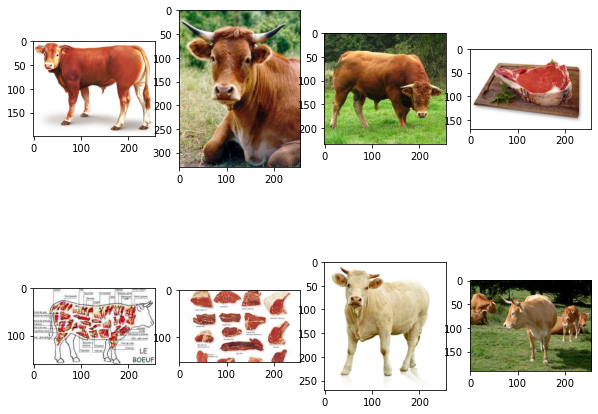

In [53]:
word = 1001

fig, ax = plt.subplots(nrows=2, ncols=4, figsize = (10, 8))

for i in range(0,4):
    ax[0, i].imshow(plt.imread(f'/Users/Lindsey/Documents/dsir-322/capstone/data/french/scale-french-package/scale-french-package/{word}/0{i+1}.jpg'))
    ax[1, i].imshow(plt.imread(f'/Users/Lindsey/Documents/dsir-322/capstone/data/french/scale-french-package/scale-french-package/{word}/0{i+5}.jpg'))
    
print(pd.DataFrame(french_dictionary.iloc[word]))
print(pd.DataFrame(translation.iloc[word]))

              3501
french_word  fleur
                                3501
french_word                    fleur
english_translation  blossom, flower


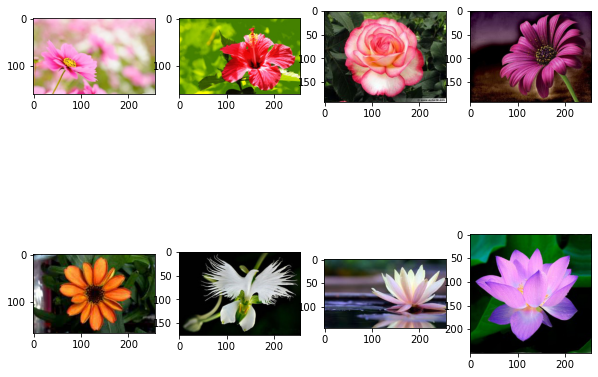

In [62]:
word = 3501

fig, ax = plt.subplots(nrows=2, ncols=4, figsize = (10, 8))

for i in range(0,4):
    ax[0, i].imshow(plt.imread(f'/Users/Lindsey/Documents/dsir-322/capstone/data/french/scale-french-package/scale-french-package/{word}/0{i+1}.jpg'))
    ax[1, i].imshow(plt.imread(f'/Users/Lindsey/Documents/dsir-322/capstone/data/french/scale-french-package/scale-french-package/{word}/0{i+5}.jpg'))
    
print(pd.DataFrame(french_dictionary.iloc[word]))
print(pd.DataFrame(translation.iloc[word]))

In [40]:
image_gen = ImageDataGenerator(rescale = 1/255., validation_split=0.2)

In [43]:
french_train = image_gen.flow_from_directory('/Users/Lindsey/Documents/dsir-322/capstone/data/french/scale-french-package/scale-french-package', 
                                            target_size = (299, 299),
                                            subset = 'training')

Found 772821 images belonging to 9887 classes.


In [44]:
french_val = image_gen.flow_from_directory('/Users/Lindsey/Documents/dsir-322/capstone/data/french/scale-french-package/scale-french-package', 
                                            target_size = (299, 299),
                                            subset = 'validation')

Found 187991 images belonging to 9887 classes.


In [13]:
french_data[0][0].shape

(32, 299, 299, 3)

In [14]:
# np.asarray(french_data)

In [45]:
mini_french = image_gen.flow_from_directory('/Users/Lindsey/Documents/dsir-322/capstone/data/french/mini-french-package',
                                                  target_size = (299, 299))

Found 9758 images belonging to 9887 classes.


In [16]:
mini_french[0][0].shape

(32, 299, 299, 3)

In [18]:
type(mini_french)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [17]:
# np.asarray(mini_french)

In [ ]:
model = Sequential()

# model.add(Conv2D(16, (3, 3), activation = 'relu'))
# model1.add(MaxPool2D((2, 2)))

model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(9887, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

In [ ]:
history = model.fit(mini_french,
                    epochs = 5)